# Adjudicative Appeals Notebook

### Imports

In [1]:
# Michaela Webster's Thesis Project #
""" This project aims to try to predict the outcome of security clearance appeals cases """

#use this link for scikit learn help: https://www.ritchieng.com/pandas-scikit-learn/

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# imports
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import shlex
import sklearn
from sklearn import metrics as skmet

### Getting the Training Data

In [20]:
#open appeals_query.csv as pandas dataframe - encoding must be latin-1
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\appeals_query.csv"
data = pd.read_csv(path_to_file, encoding='latin-1')

df = data.groupby(['Age','Denied']).size()
#print bar graph of ave vs denied yes/no
print (df)

Age   Denied
19.0  True       1
20.0  False      5
      True       3
21.0  False      3
      True       5
22.0  False      5
      True      10
23.0  False     19
      True      14
24.0  False     19
      True      31
25.0  False     25
      True      42
26.0  False     23
      True      46
27.0  False     33
      True      46
28.0  False     25
      True      59
29.0  False     26
      True      64
30.0  False     33
      True      58
31.0  False     43
      True      57
32.0  False     36
      True      63
33.0  False     40
      True      61
34.0  False     43
                ..
59.0  True      25
60.0  False     18
      True      25
61.0  False     18
      True      27
62.0  False     11
      True      20
63.0  False     12
      True      19
64.0  False      5
      True      10
65.0  False      9
      True       8
66.0  False      9
      True       5
67.0  False      3
      True       4
68.0  False      7
      True       7
69.0  False      3
      True       3

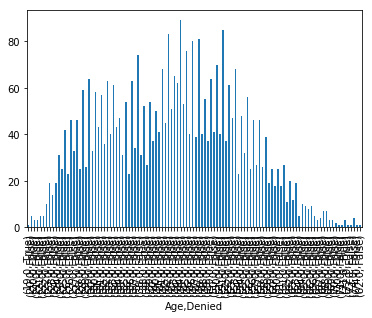

In [21]:
#print bar graph to show denied
#cannot do this through cmd
df.plot.bar()

### Prime Data for Machine Learning

In [23]:
# set the featured columns for X (all true/false fields)
feature_cols = ['Smith','Female','Position_Eligibility','No_Falsification', 'Rebut_Falsification','Falsification(s)','Domestic_Violence', 'Traumatic_Life_Event', 'Child_Sexual_Abuse', 'Child_Pornography', 'Prostitutes','Fmr_Military_LawE','Adverse_Affirmed','Granted','Failed_to_Mitigate', 'Favorable_Affirmed','Success_to_Mitigate','Adverse_Reversed','Revoked_Fav_Reversed','Adverse_Remanded','Favorable_Remanded','Remanded_wInstructions','Recommend_Waiver','Decision_Other','Decision_Unknown','Security_Violations','Foreign_Influence','Foreign_Preference','Personal_Conduct','Emotional_Mental','Criminal_Conduct','Handling_PI','Outside_Activities','Use_InfoSys','Deception','CAC','Unknown_Guideline','Domestic_Violence', 'Traumatic_Life_Event', 'Child_Sexual_Abuse', 'Child_Pornography', 'Prostitutes', 'Sexual_Behavior']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y = data.Denied

### Feed the Data and Outcome into LogisticRegression Model

In [24]:
# START DOING MACHINE LEARNING STUFF
# 1. import
from sklearn.linear_model import LogisticRegression
# 2. instantiate model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# FOR TEST DATA
#open sexual_test.csv as pandas dataframe
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\sexual_test.csv"
data2 = pd.read_csv(path_to_file, encoding='latin-1')
X_new = data.loc[:, feature_cols]
new_pred_class = logreg.predict(X_new)

In [26]:
new_pred_class

array([ True,  True,  True, ..., False, False,  True])

### Find Model Accuracy

In [31]:
appeals_accuracy = skmet.accuracy_score(new_pred_class, y)
print('Accuracy Score for Adjudicative Appeals model: ',appeals_accuracy)

appeals_f1 = skmet.f1_score(y,new_pred_class)
print('F1 score for Adjudicative Appeals Model: ',appeals_f1)

Accuracy Score for Adjudicative Appeals model:  0.9950765330993467


F1 score for Adjudicative Appeals Model:  0.9953329328589251


### Future Work

1. look into other models